<a href="https://colab.research.google.com/github/purrvaja/BERT/blob/main/Bert_topic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the data and dependencies

In [ ]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#importing the dataset

df = pd.read_csv('/content/gdrive/My Drive/Data Science/Topic Modelling/papers.csv')
df.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [ ]:
#removing unwanted columns
df.drop(["id", "event_type", "abstract"], axis=1, inplace =True)

In [ ]:
df.shape

(7241, 4)

In [ ]:
df.isnull().sum()

year          0
title         0
pdf_name      0
paper_text    0
dtype: int64

In [ ]:
# creating a column with the length of the title text
df['title_length'] = df['title'].apply(lambda x: len(x.split()))

In [ ]:
print("The longest headline has: {} words".format(df['title_length'].max()))

The longest headline has: 20 words


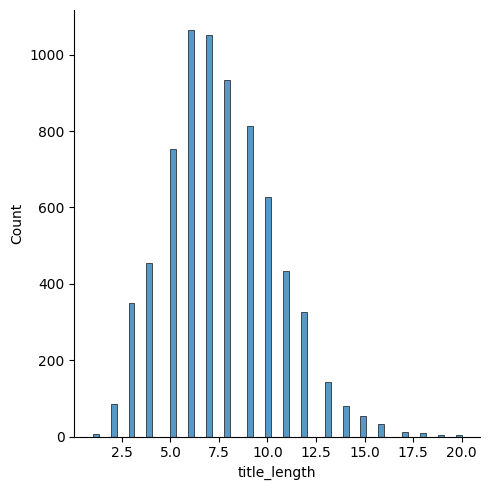

In [ ]:
# Visualize the length distribution

sns.displot(df['title_length'], kde=False)

In [ ]:
df.columns

Index(['year', 'title', 'pdf_name', 'paper_text', 'title_length'], dtype='object')

In [ ]:
for idx in df.sample(3).index:
    headline = df.iloc[idx]
    print("Headline #{}:".format(idx))
    print("Publication year: {}".format(headline.year))
    print("Text: {}\n".format(headline.title))

Headline #5916:
Publication year: 2016
Text: Learning brain regions via large-scale online structured sparse dictionary learning

Headline #555:
Publication year: 1998
Text: Lazy Learning Meets the Recursive Least Squares Algorithm

Headline #4822:
Publication year: 2014
Text: Learning Time-Varying Coverage Functions



## Topic Modelling

In [ ]:
!pip install bertopic
from bertopic import BERTopic

In [ ]:
# training the model


model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 7)
topics, _ = model.fit_transform(df['title'])

2024-01-27 13:47:55,905 - BERTopic - Embedding - Transforming documents to embeddings.


.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/227 [00:00<?, ?it/s]

2024-01-27 13:48:46,737 - BERTopic - Embedding - Completed ✓
2024-01-27 13:48:46,739 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-27 13:49:44,232 - BERTopic - Dimensionality - Completed ✓
2024-01-27 13:49:44,236 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-27 13:49:44,768 - BERTopic - Cluster - Completed ✓
2024-01-27 13:49:44,785 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-27 13:49:45,333 - BERTopic - Representation - Completed ✓


In [ ]:
# topic extraction and representation

freq = model.get_topic_info()

print('Number of topics {}'.format(len(freq)))


Number of topics 188


In [ ]:
freq.head()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2302,-1_neural_of_the_and,"[neural, of, the, and, for, learning, detectio...",[Fast Classification Rates for High-dimensiona...
1,0,247,0_bayesian_bayes_pac_inference,"[bayesian, bayes, pac, inference, nonparametri...","[Multi-dynamic Bayesian Networks, Analysis of ..."
2,1,170,1_reinforcement_learning_inverse_agent,"[reinforcement, learning, inverse, agent, pac,...",[Hierarchical Memory-Based Reinforcement Learn...
3,2,167,2_networks_recurrent_network_social,"[networks, recurrent, network, social, deep, b...","[Spiking Inputs to a Winner-take-all Network, ..."
4,3,99,3_neurons_spiking_neuron_neuronal,"[neurons, spiking, neuron, neuronal, single, c...",[On the Computational Complexity of Networks o...


In [ ]:
"""
topic is the topic number:
    outliers are labeled as -1 (should be ignored)

count: number of words in the topic

name: name given to the topic

"""

In [ ]:
# retrieve the top words and their corresponding tf-idf score
# higher the score, the more relevant the word is in representing the topic


a_topic = freq.iloc[1]["Topic"] # Select the 1st topic
model.get_topic(a_topic) # Show the words and their c-TF-IDF scores

[('bayesian', 0.07895916609504582),
 ('bayes', 0.03348514207362319),
 ('pac', 0.017373074576624525),
 ('inference', 0.01513094453798584),
 ('nonparametric', 0.014741426202783977),
 ('variational', 0.012394659019661554),
 ('posterior', 0.010871050058526843),
 ('models', 0.009805072623900122),
 ('treewidth', 0.009002127131628145),
 ('optimization', 0.006847303519388053)]

Topic Visualization

In [ ]:
model.visualize_barchart(top_n_topics=6)

Search Topics

In [ ]:
# select the most 3 similar topics
similar_topics, similarity = model.find_topics("politics", top_n = 3)

In [ ]:
similar_topics

[170, 151, 65]

In [ ]:
most_similar = similar_topics[0]
print("Most Similar Topic Info: \n{}".format(model.get_topic(most_similar)))
print("Similarity Score: {}".format(similarity[0]))

Most Similar Topic Info: 
[('voting', 0.31073413831137864), ('majority', 0.2950253571246524), ('votes', 0.24828905294087333), ('approval', 0.17989116437191532), ('vote', 0.15536706915568932), ('adjusted', 0.10226513834977137), ('urn', 0.10226513834977137), ('win', 0.10226513834977137), ('issue', 0.10226513834977137), ('exchangeability', 0.10226513834977137)]
Similarity Score: 0.3704677224159241


In [ ]:
# Visualize outliers + inliers
fig, ax = plt.subplots(figsize=(15, 15))
scatter_outliers = ax.scatter(outliers['x'], outliers['y'], c="#E0E0E0", s=1, alpha=.3)
scatter = ax.scatter(non_outliers['x'], non_outliers['y'], c=non_outliers['topic'], s=1, alpha=.3, cmap=cmap)

# Add topic names to clusters
centroids = to_plot.groupby("topic").mean().reset_index().iloc[1:]
for row in centroids.iterrows():
   topic = int(row[1].topic)
   text = f"{topic}: " + "_".join([x[0] for x in model.get_topic(topic)[:3]])
   ax.text(row[1].x, row[1].y*1.01, text, fontsize=fontsize, horizontalalignment='center')

ax.text(0.99, 0.01, f"BERTopic - Top {top_n} topics", transform=ax.transAxes, horizontalalignment="right", color="black")
plt.xticks([], [])
plt.yticks([], [])
#plt.savefig("BERTopic_Example_Cluster_Plot.png")
plt.show()